In [31]:
from datetime import date, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [32]:
data = pd.read_csv("patient.csv", parse_dates = True)

pd.date_range(start="2020-1-20", end="2020-2-28", freq="D")

DatetimeIndex(['2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23',
               '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04',
               '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08',
               '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12',
               '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16',
               '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20',
               '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24',
               '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28'],
              dtype='datetime64[ns]', freq='D')

In [33]:
data["confirmed_date"]

0       2020-01-20
1       2020-01-24
2       2020-01-26
3       2020-01-27
4       2020-01-30
           ...    
4807    2020-03-02
4808    2020-03-02
4809    2020-03-02
4810    2020-03-02
4811    2020-03-02
Name: confirmed_date, Length: 4812, dtype: object

In [34]:
a = pd.to_datetime(data["confirmed_date"])
data["confirmed_date"] = a

Text(0.5, 1.0, 'corona')

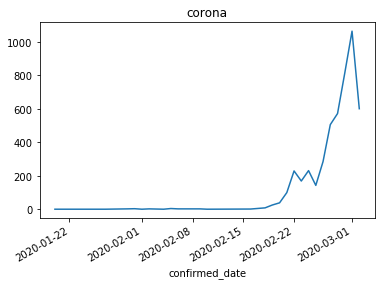

In [35]:


list = pd.date_range(start="2020-1-20", end="2020-2-28", freq="D")
list = pd.DataFrame(list)
list["y"] = 0
list.columns = ["ds","y"]

count = data.groupby(data["confirmed_date"]).id.count()
accumulate = count.cumsum()    

count.plot()
plt.title("corona")

In [36]:
data = count.resample("D").first().fillna(0).cumsum()
data = data[28:]

data.values
data.index

DatetimeIndex(['2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20',
               '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24',
               '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-02-29', '2020-03-01', '2020-03-02'],
              dtype='datetime64[ns]', name='confirmed_date', freq='D')

In [37]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=[32, 32, 10], max_iter=50000, alpha=0.0005, random_state=26)
model.fit(x, y)

MLPRegressor(activation='relu', alpha=0.0005, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=[32, 32, 10], learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=50000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=26, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [43]:
test = np.arange(len(data)+30).reshape(-1, 1)
pred = model.predict(test)

# get time sequence data as pd.Series
prediction = pred.round().astype(int)
week = [data.index[0] + timedelta(days=i) for i in range(len(prediction))]
dt_idx = pd.DatetimeIndex(week)
predicted_count = pd.Series(prediction, dt_idx)

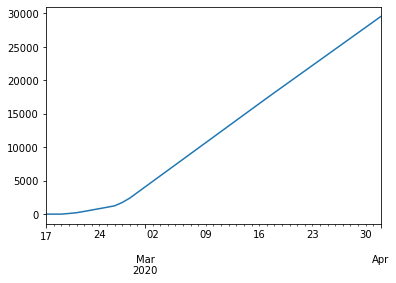

In [44]:
predicted_count.plot()